**Neural Networks**

This exercise is based how neural networks works and what are the function used in it to predict and optimize the dataset.

In [96]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image,ImageOps
from matplotlib import pyplot as plt

In [2]:
model=keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
model.compile(optimizer='sgd',loss='mean_squared_error')

In [3]:
x=np.array([-1.0,0.0,1.0,2.0,3.0,4.0])
y=np.array([-3.0,-1.0,1.0,3.0,5.0,7.0])

In [ ]:
model.fit(x,y,epochs=10)
print(model.predict([10.0]))

Epoch 1/10
1/1 [==============================] - 0s 15ms/step - loss: 8.3096e-06
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 8.1393e-06
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 7.9718e-06
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 7.8081e-06
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 7.6478e-06
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 7.4909e-06
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 7.3368e-06
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 7.1865e-06
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 7.0390e-06
Epoch 10/10
1/1 [==============================] - 0s 31ms/step
[[18.992338]]


**Loading Image DataSet**

In this we will see on how to load image dataset from tensorflow and use them predict it .

We then create a neural network model and use it for predicting the minst fashion data set

In [144]:
# Loading the fashion mnist dataset
fashion_data=tf.keras.datasets.fashion_mnist

# Loading the dataset
(train_images,train_labels),(test_images,test_labels)=fashion_data.load_data()

In [145]:
# Coding the layers

# Preprocessing the image (Normalizing the values to the range)
train_images = train_images/255.0
test_images = test_images/255.0


model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)), # The size of the image 28x28 pixels
    keras.layers.Dense(units=128,activation=tf.nn.relu), # There are 128 units inside
    keras.layers.Dense(units=10,activation=tf.nn.softmax) # The output is for classifying 10 so we give units as 10
])


In [146]:
#This function is to compile the model with best parameters 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

#Fitting the model with the given training images and the corresponding labels
hist=model.fit(train_images,train_labels,epochs=20)

#Evaluating the model on how best it give for training and testing data test
model.evaluate(test_images,test_labels)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4940 - accuracy: 0.8255
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3705 - accuracy: 0.8650
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3359 - accuracy: 0.8768
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3109 - accuracy: 0.8863
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2933 - accuracy: 0.8910
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2786 - accuracy: 0.8966
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2661 - accuracy: 0.9024
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2531 - accuracy: 0.9050
Epoch 9/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2453 - accuracy: 0.9077
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.235

[0.3461932837963104, 0.8906999826431274]

**Implementing Convolution Layers**

We perform convolution with the group of pixels which enhances the image which we have already studied in Computer Vision and Image Analysis for e.g. we take a 3x3 pixel matrix from the given image and we convolute with sobel operator mask of 3x3 which we get a enhanced image.

This is mainly done to make computationally faster and reduce the size of the image.

**Pooling**

In this we choose the max value and place it in the matrix.

In [ ]:
model1=keras.Sequential([
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)), # Performing the convolution
    keras.layers.MaxPool2D(2,2),                                           # Performing the pooling
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(input_shape=(28,28)), # The size of the image 28x28 pixels
    keras.layers.Dense(units=128,activation=tf.nn.relu), # There are 128 units inside
    keras.layers.Dense(units=10,activation=tf.nn.softmax) # The output is for classifying 10 so we give units as 10
])


# to get the summary of the sequential layer 
model1.summary()

In [ ]:
#This function is to compile the model with best parameters 
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

#Fitting the model with the given training images and the corresponding labels
hist1=model1.fit(train_images,train_labels,epochs=20)

#Evaluating the model on how best it give for training and testing data test
model1.evaluate(test_images,test_labels)

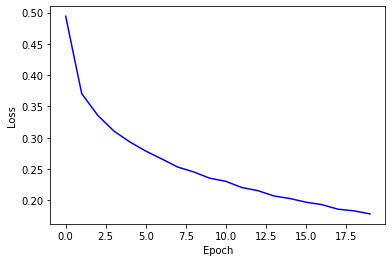

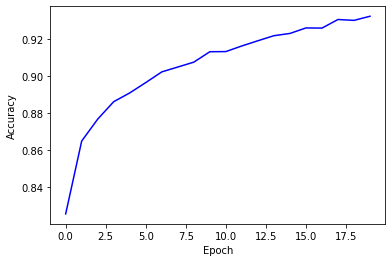

In [147]:
# Plotting the data
plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(hist.history['accuracy'], 'b-', label='train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [153]:
# Predicting the outputs for Test images
classifications = model.predict(test_images)

prob_values=classifications[10]
print("\nprobability values of classifying particular image: ")
print(prob_values)

# We find the max probability value among the list to which the image image belongs to 
prob_values=prob_values.tolist()
print("\nThe predicted Image belongs to the label {val}".format(val=(prob_values.index(max(prob_values)))))
print("The Actual Output of the image belongs to label: ",test_labels[10])

313/313 [==============================] - 1s 3ms/step

probability values of classifying particular image: 
[1.4853880e-06 7.5129890e-08 2.1333251e-02 3.4691516e-10 9.7499186e-01
 6.6279312e-14 3.6732119e-03 1.0416982e-13 2.8059959e-12 3.6445704e-09]

The predicted Image belongs to the label 4
The Actual Output of the image belongs to label:  4


In [160]:
# This is to predict the image from downloaded image
bag=Image.open('download.jpg')

# Convert the image to grayscale
bag=ImageOps.grayscale(bag)

print(bag.size)

arr=np.asarray(bag)
arr=arr/255.0



# This is to predict single image in the MNIST dataset
img=test_images[10]
prob=model.predict(img)
print(prob)
print(max(prob[0]))

(28, 19)
1/1 [==============================] - 0s 32ms/step
[[1.4853911e-06 7.5130039e-08 2.1333294e-02 3.4691652e-10 9.7499192e-01
  6.6279440e-14 3.6732121e-03 1.0417002e-13 2.8060013e-12 3.6445706e-09]]
0.9749919


In [72]:

arr=test_images[3]
arr=arr*255.0

img=Image.fromarray(arr)
img.show()

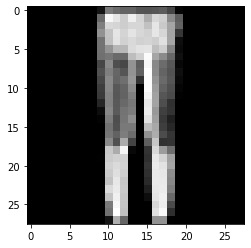

In [73]:
plt.imshow(img, interpolation='nearest')
plt.show()